# Traditional Image Processing Feature Detectors:


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from skimage import color

# Display inline in Jupyter
%matplotlib inline

| Library                  | Purpose                                                                                                |
| ------------------------ | ------------------------------------------------------------------------------------------------------ |
| **OpenCV (`cv2`)**       | Computer vision library used for image loading, conversion, and traditional methods like Haar and ORB. |
| **NumPy (`np`)**         | Handles numerical operations and matrix handling (images are arrays).                                  |
| **Matplotlib**           | Used for displaying images inline in Jupyter notebooks.                                                |
| **scikit-image**         | Provides advanced image processing tools, especially HOG (Histogram of Oriented Gradients).            |
| **`%matplotlib inline`** | Ensures plots appear directly in the notebook cells.                                                   |


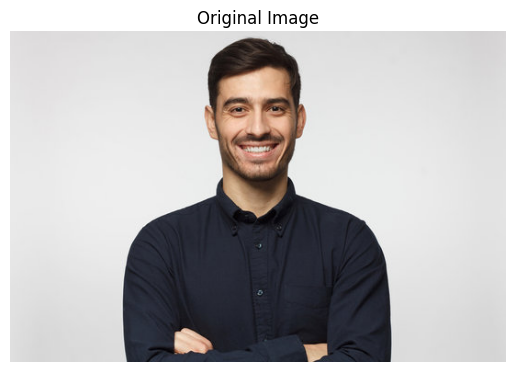

In [7]:
img_path = "image/person.jpg"  # Replace with your image

# Load the image in BGR (default OpenCV format)
image = cv2.imread(img_path)

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale for Haar and ORB
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display original image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


- OpenCV reads images in BGR format, but `matplotlib`expects RGB, so we convert it using cv2.`cvtColor()`.

- Many classical methods like Haar and ORB work best on grayscale images, which reduce complexity and noise.

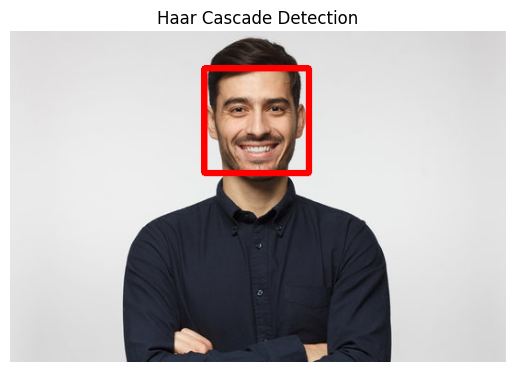

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

haar_img = image_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(haar_img, (x, y), (x+w, y+h), (255, 0, 0), 5)

plt.imshow(haar_img)
plt.title("Haar Cascade Detection")
plt.axis("off")
plt.show()

- `CascadeClassifier`: Loads a pre-trained Haar model from OpenCV’s data directory.

- `detectMultiScale()`: Scans image at multiple scales to detect faces.

    - `scaleFactor=1.1`: Shrinks image by 10% at each scale.

    - `minNeighbors=5`: Higher values reduce false positives.

- `cv2.rectangle()`: Draws bounding boxes around detected faces.

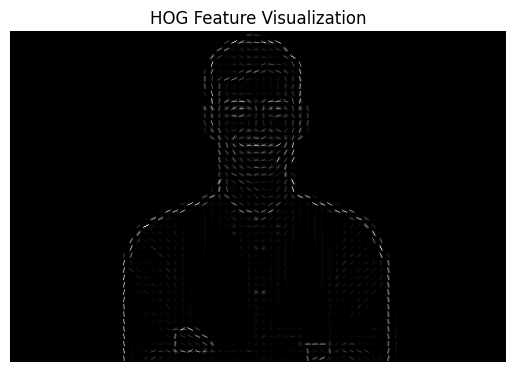

In [9]:
gray_float = color.rgb2gray(image_rgb)

hog_features, hog_image = hog(
    gray_float,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True
)

plt.imshow(hog_image, cmap="gray")
plt.title("HOG Feature Visualization")
plt.axis("off")
plt.show()


- HOG describes edge direction patterns using histograms of gradients.

- `pixels_per_cell`: Size of small region for computing gradients.

- `cells_per_block`: How many neighboring cells to normalize together.

- `visualize=True`: Returns an image of the gradient directions.

HOG is a descriptor, not a detector — it doesn’t detect objects but shows texture and structure information.

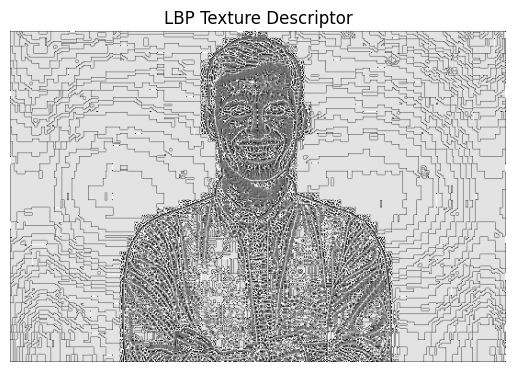

In [10]:
lbp_image = local_binary_pattern(gray, P=8, R=1, method="uniform")

plt.imshow(lbp_image, cmap="gray")
plt.title("LBP Texture Descriptor")
plt.axis("off")
plt.show()


- LBP captures local texture by comparing each pixel to its neighboring pixels.

- `P=8`: Number of circularly symmetric neighbor set points.

- `R=1`: Radius of the circle (distance from center pixel to neighbors).

- `method="uniform"`: Uses uniform LBP patterns (fewer transitions, more robust features).

LBP is fast and useful for texture classification and simple face recognition tasks, but lacks rotation and scale invariance.


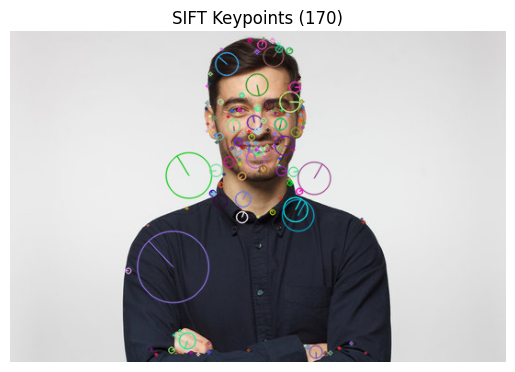

In [11]:
sift = cv2.SIFT_create()
sift_kp, _ = sift.detectAndCompute(gray, None)

sift_img = cv2.drawKeypoints(image_rgb, sift_kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(sift_img)
plt.title(f"SIFT Keypoints ({len(sift_kp)})")
plt.axis("off")
plt.show()


- SIFT detects scale- and rotation-invariant keypoints and computes local descriptors.

- `cv2.SIFT_create()`: Initializes the SIFT detector.

- `detectAndCompute()`: Finds keypoints and computes descriptors in one call.

- `DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS`: Draws the size and orientation of keypoints.

SIFT is highly accurate for object matching and image stitching but slower than modern alternatives.


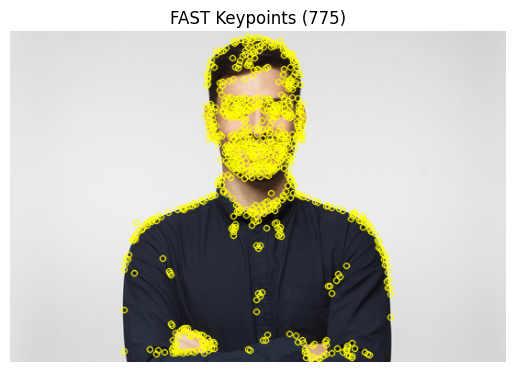

In [12]:
fast = cv2.FastFeatureDetector_create()
fast_kp = fast.detect(gray, None)

fast_img = cv2.drawKeypoints(image_rgb, fast_kp, None, color=(255, 255, 0))

plt.imshow(fast_img)
plt.title(f"FAST Keypoints ({len(fast_kp)})")
plt.axis("off")
plt.show()

- FAST detects corner points quickly by comparing a pixel’s intensity to its surrounding circle.

- `cv2.FastFeatureDetector_create()`: Initializes the FAST corner detector.

- `detect()`: Finds keypoints without computing descriptors.

- `drawKeypoints()`: Displays detected corners on the image.

FAST is extremely fast and good for real-time applications, but lacks scale and rotation invariance.


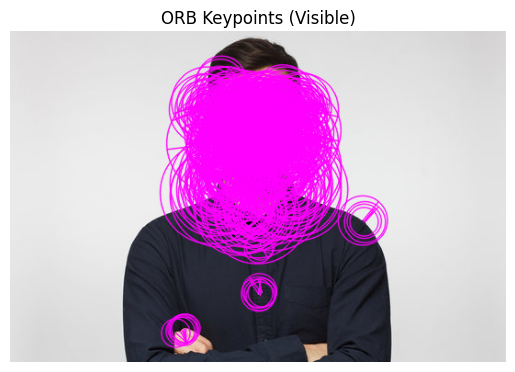

In [13]:
orb = cv2.ORB_create(nfeatures=500)
keypoints = orb.detect(gray, None)

orb_img = cv2.drawKeypoints(
    image_rgb, keypoints, None,
    color=(255, 0, 255),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.imshow(orb_img)
plt.title("ORB Keypoints (Visible)")
plt.axis("off")
plt.show()


- ORB is a feature detector and descriptor, useful for matching or tracking.

- `nfeatures=100`: Limits to 100 strongest keypoints.

- `detect()`: Finds keypoints in the grayscale image.

- `drawKeypoints()`: Visualizes keypoints as purple dots.

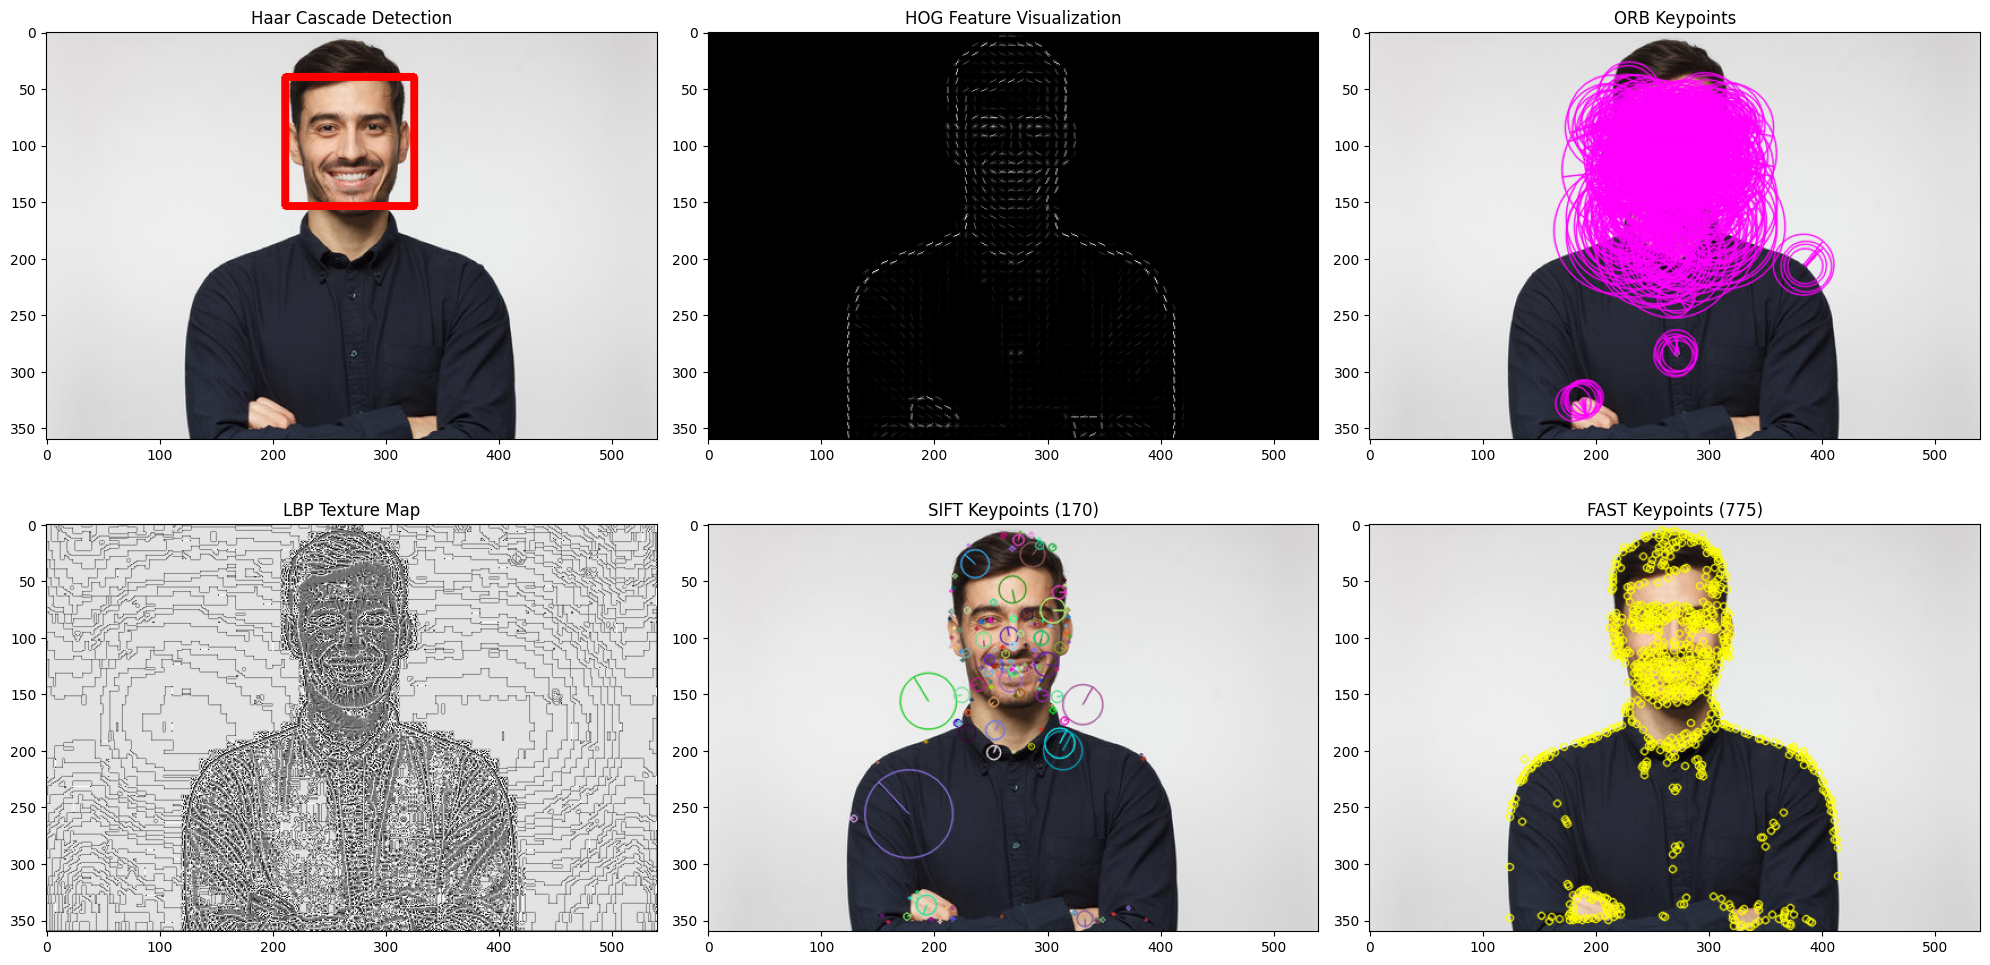

In [14]:
# Create a figure with 2 rows × 4 columns to fit 7 techniques
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# First row
axes[0, 0].imshow(haar_img)
axes[0, 0].set_title("Haar Cascade Detection")

axes[0, 1].imshow(hog_image, cmap="gray")
axes[0, 1].set_title("HOG Feature Visualization")

axes[0, 2].imshow(orb_img)
axes[0, 2].set_title(f"ORB Keypoints")

# Second row
axes[1, 0].imshow(lbp_image, cmap="gray")
axes[1, 0].set_title("LBP Texture Map")

axes[1, 1].imshow(sift_img)
axes[1, 1].set_title(f"SIFT Keypoints ({len(sift_kp)})")

axes[1, 2].imshow(fast_img)
axes[1, 2].set_title(f"FAST Keypoints ({len(fast_kp)})")


plt.tight_layout()
plt.show()


#### Summary
| Technique | Type                   | ⚡ Speed     | 🛡️ Robustness           | 🔍 Used For             |
|-----------|------------------------|-------------|-------------------------|-------------------------|
| Haar      | Handcrafted Cascade    | ✅ Fast      | ❌ Pose-sensitive        | Face/Object detection   |
| HOG       | Gradient Descriptor    | ⚠️ Medium    | ✅ Robust edges          | Pedestrian detection    |
| LBP       | Texture Descriptor     | ✅ Fast      | ❌ No scale invariance   | Texture, Face features  |
| SIFT      | Keypoints + Descriptor | ❌ Slow      | ✅✅✅ Robust              | Matching, Stitching     |
| FAST      | Corner Detector        | ✅✅✅ Very fast | ❌ Not stable            | SLAM, Real-time vision  |
| ORB       | Hybrid (FAST+BRIEF)    | ✅✅ Fast     | ✅ Lightweight & robust  | Feature matching        |



#### What You Learned
- Traditional computer vision methods don’t require training on large datasets.

- You used:

    - Haar Cascade: Detect faces or objects

    - HOG: Understand structure and edge orientation

    - ORB: Detect keypoints for feature matching